In [13]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [14]:
# Loading the CSV file
data = pd.read_csv('data_hw3.csv')

In [15]:
# Sorting the data by 'Propellant age (Weeks) x' column in ascending order
data.sort_values(by='Propellant age (Weeks) x', inplace=True)

In [16]:
data

,Test,Propellant age (Weeks) x,Shear strength (MPa) y
7,8,2.50,17.78
4,5,5.50,15.22
8,9,7.50,16.26
2,3,8.00,15.97
9,10,11.00,15.56
0,1,15.50,14.88
3,4,17.00,14.21
5,6,19.00,11.78
1,2,23.75,11.57
6,7,24.00,12.31


In [17]:
# Extracting the features (x) and target (y) from the dataset
x = data['Propellant age (Weeks) x'].values.reshape(-1, 1)
y = data['Shear strength (MPa) y'].values

In [18]:
x

array([[ 2.5 ],
       [ 5.5 ],
       [ 7.5 ],
       [ 8.  ],
       [11.  ],
       [15.5 ],
       [17.  ],
       [19.  ],
       [23.75],
       [24.  ]])

In [19]:
y

array([17.78, 15.22, 16.26, 15.97, 15.56, 14.88, 14.21, 11.78, 11.57,
       12.31])

In [20]:
# Creating a DataFrame to store the results
results_ridge = pd.DataFrame()

In [21]:
# Ridge regularization with different lambdas
for alpha in [0, 1e-2, 1e-4]:
    # Creating a Polynomial Regression model with Ridge regularization
    model = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=alpha))

    # Fitting the model
    model.fit(x, y)

    # Predicting using the model
    y_pred = model.predict(x)
    print(y_pred)
    # Storing the results in the DataFrame
    results_ridge[f'Lambda={alpha}'] = y_pred

[17.16233454 16.51492919 16.06431593 15.9492864  15.23914908 14.1097854
 13.71622213 13.17816431 11.83932717 11.76648585]
[17.16206494 16.51484935 16.0643322  15.9493229  15.23927499 14.1099428
 13.71636265 13.17826105 11.83922243 11.7663667 ]
[17.16233184 16.51492839 16.06431609 15.94928677 15.23915034 14.10978698
 13.71622353 13.17816527 11.83932613 11.76648466]


In [22]:
results_ridge

,Lambda=0,Lambda=0.01,Lambda=0.0001
0,17.162335,17.162065,17.162332
1,16.514929,16.514849,16.514928
2,16.064316,16.064332,16.064316
3,15.949286,15.949323,15.949287
4,15.239149,15.239275,15.239150
5,14.109785,14.109943,14.109787
6,13.716222,13.716363,13.716224
7,13.178164,13.178261,13.178165
8,11.839327,11.839222,11.839326
9,11.766486,11.766367,11.766485


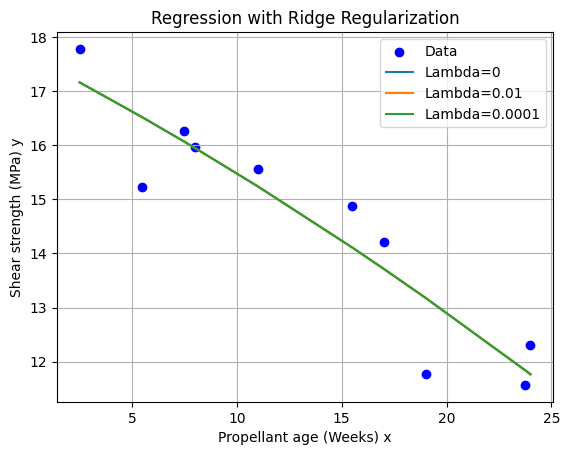

In [23]:
# Plotting the original data points
plt.scatter(x, y, label='Data', color='b')

# Plotting the regression lines for different lambdas
for column in results_ridge.columns:
    plt.plot(x, results_ridge[column], label=column)

plt.xlabel('Propellant age (Weeks) x')
plt.ylabel('Shear strength (MPa) y')
plt.title('Regression with Ridge Regularization')
plt.legend()
plt.grid(True)
plt.show()

0.8595812312638439
17.9369338469873
-0.25292963341961117


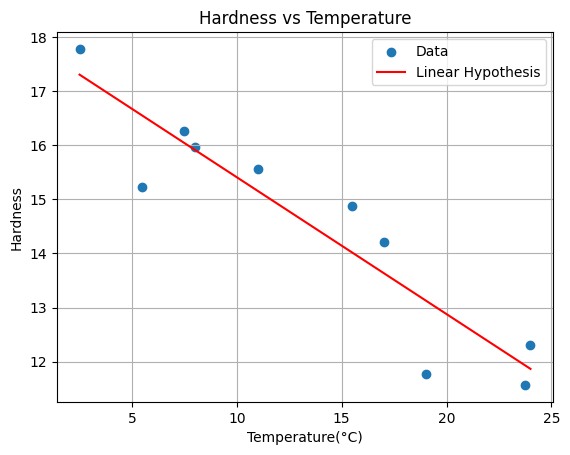

In [24]:
# Linear regression

from scipy import stats

x = data['Propellant age (Weeks) x']
y = data['Shear strength (MPa) y']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
print(r*r)
print(intercept)
print(slope)
plt.scatter(x, y,label="Data")
plt.plot(x, mymodel, c='r',label="Linear Hypothesis")
plt.title("Hardness vs Temperature")
plt.xlabel(f"Temperature({chr(176)}C)")
plt.ylabel("Hardness")
plt.legend()
plt.grid()
plt.show()